In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
df = pd.read_csv('/content/PubMed_Diabets.csv')

In [ ]:
df.head()

,text,label
0,Significant alterations in heart carbohydrate ...,1
1,Isolated spontaneously beating atria from stre...,1
2,The effects of streptozotocin-induced diabetes...,1
3,Isolated small intestinal microvillous membra...,1
4,Transplantation of adult rat pancreatic islet ...,1


In [ ]:
print("Number of labels")
df.label.value_counts()


Number of labels


2    1919
1    1221
3    1214
Name: label, dtype: int64

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4354 entries, 0 to 4353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4354 non-null   object
 1   label   4354 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 102.0+ KB


In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
import string
import re
#punctuations
punctuations = string.punctuation
#stopwords
stop_words = list(STOP_WORDS)
def clean_text(
  string : str,
  ponctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~',
  stop_words = stop_words)->str : 

  #URLs
  string = re.sub(r"https?://\S+|www\.\S+",'',string)
  #html 
  string = re.sub(r'<.*?>','',string)
  #Numbers
  string = re.sub(r'[0-9]+','',string) 

  #Remove punctuations
  for x in string.lower():
    if x in punctuations:
      string = string.replace(x,"")
  #To lower
  string = string.lower()
  #Remove stop words
  string = ' '.join([word for word in string.split() if word not in stop_words])
  #Cleaning the whitespaces
  string = re.sub(r'\s', ' ', string).strip()
  return string
  
clean_text("hello it's me , i was wonderning   https://jahdjadad.com     if after all this years 02 ")

'hello wonderning years'

<function matplotlib.pyplot.show>

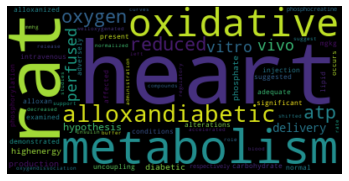

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
abstract = df.text.to_list()
abstracts_cleaned = [clean_text(x) for x in abstract]
#wordcloud for one document
text = abstracts_cleaned[0]
#Creat and generate a wordcloud image :
wordcloud = WordCloud().generate(text)
#Display the generated image
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show>

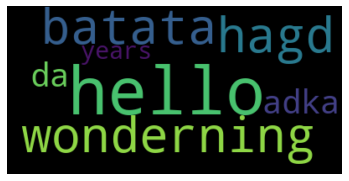

In [ ]:
abstract = "hello it's me , i was wonderning batata hagd adka da  https://jahdjadad.com     if after all this years 02 "
abstract_cleaned = clean_text(abstract) 
#Creat and generate a wordcloud image :
wordcloud = WordCloud().generate(abstract_cleaned)
#Display the generated image
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show